# Joining Data

### Inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

In [132]:
# Import pandas package
import pandas as pd

# Load the data and print
taxi_owners = pd.read_pickle("../data/taxi_owners.p")
taxi_veh = pd.read_pickle("../data/taxi_vehicles.p")
print(taxi_owners.head(), "\n")
print(taxi_veh.head())

     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618 

    vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO


In [133]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid")

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [134]:
# Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid", suffixes=["_own", "_veh"])

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [135]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh["fuel_type"].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

In [136]:
# Load the data and print
wards = pd.read_pickle("../data/ward.p")
census = pd.read_pickle("../data/census.p")

print(wards.head(), "\n")
print(census.head())

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649 

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  


In [137]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on="ward", suffixes=["_wards", "census"])

# Print the shape of wards_census
print("wards_census table shape:", wards_census.shape)

wards_census table shape: (50, 9)


In [138]:
# Define the data types for the columns
data_types = {"ward": str, "alderman": str, "address": str, "zip": str}

# Read the CSV with specified data types
wards_altered = pd.read_csv("../data/wards_altered.csv", dtype=data_types)

# Print the first few rows of the wards_altered table to view the change
print(wards_altered[["ward"]].head())

  ward
0   61
1    2
2    3
3    4
4    5


In [139]:
# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on="ward")

# Print the shape of wards_altered_census
print("wards_altered_census table shape:", wards_altered_census.shape)

wards_altered_census table shape: (49, 9)


In [140]:
# Define the data types for the columns
data_types = {
    "ward": str,
    "pop_2000": int,
    "pop_2010": int,
    "change": str,
    "address": str,
    "zip": str,
}

# Read the CSV with specified data types
census_altered = pd.read_csv("../data/census_altered.csv", dtype=data_types)

# Print the first few rows of the wards_altered table to view the change
print(census_altered[["ward"]].head())

   ward
0  None
1     2
2     3
3     4
4     5


In [141]:
# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on="ward")

# Print the shape of wards_census_altered
print("wards_census_altered table shape:", wards_census_altered.shape)

wards_census_altered table shape: (49, 9)


> In step 1, the .merge() returned a table with the same number of rows as the original wards table. However, in steps 2 and 3, using the altered tables with the altered first row of the ward column, the number of returned rows was fewer. There was not a matching value in the ward column of the other table. _Remember that .merge() only returns rows where the values match in both tables._

### One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [142]:
# Load data
licenses = pd.read_pickle("../data/licenses.p")
biz_owners = pd.read_pickle("../data/business_owners.p")

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on="account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").value_counts()

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df)

title            account  ward  aid  business                          address                      zip    first_name  last_name 
ASST. SECRETARY  11071    47    775  FAMILY DOLLAR STORE #7149         2424 W MONTROSE AVE          60618  CLINTON     YORK (CJ)     1
SECRETARY        327088   27    602  CHICAGO GALLERY NEWS INC.         213 W INSTITUTE PL 3 309     60610  VIRGINIA    VAN ALYEA     1
                 334538   36    864  A&D CANDY, INC.                   4545 W ARMITAGE AVE          60639  SALEH       MUSA          1
                 33483    7     829  TROPICAL DEN                      7209 S EXCHANGE AVE 1        60649  ERIC        GIBSON        1
                 335302   47    638  GENES SAUSAGE SHOP AT DELI MEYER  4746-4750 N LINCOLN AVE 1-2  60625  YOLANDA     LUSZCZ        1
                                                                                                                                    ..
PRESIDENT        319723   25    814  Baba Pita              

In [143]:
# Load data
licenses = pd.read_pickle("../data/licenses.p")
biz_owners = pd.read_pickle("../data/business_owners.p")

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on="account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({"account": "count"})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values("account", ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


> After merging the tables together, you counted the number of repeated rows with the combination of .groupby() and .agg() statements. You see that president, followed by secretary, are the most common business owner titles.

#### Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

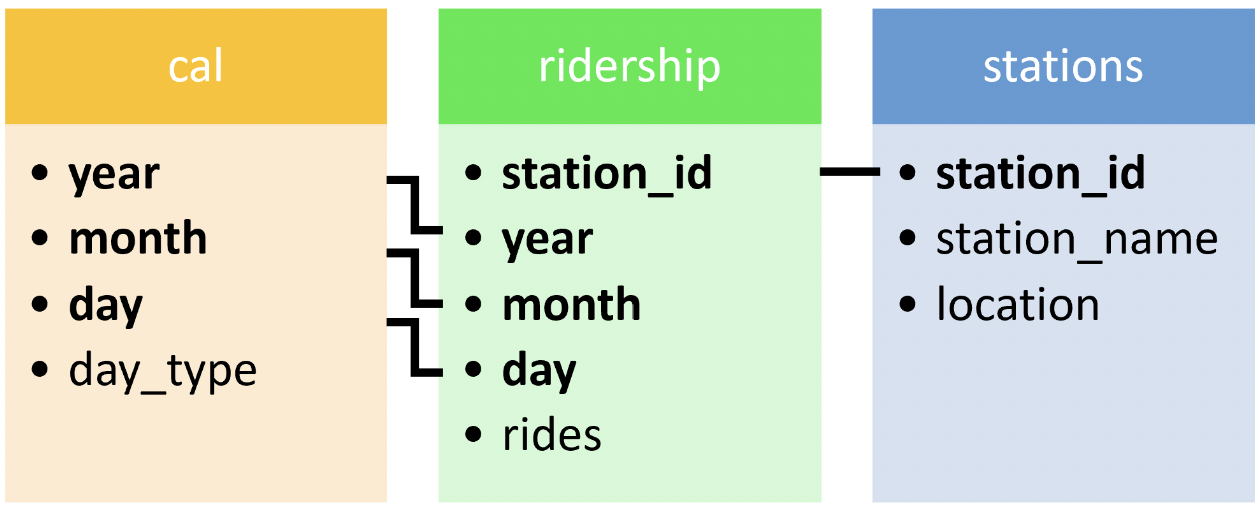

In [144]:
# Load the data
ridership = pd.read_pickle("../data/cta_ridership.p")
cal = pd.read_pickle("../data/cta_calendar.p")
stations = pd.read_pickle("../data/stations.p")

# Print the heads
print(
    f"ridership table:\n{ridership.head()}\n\ncalendar table:\n{cal.head()}\n\nstations table:\n{stations.head()}"
)

ridership table:
  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719

calendar table:
   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday

stations table:
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)


In [145]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=["year", "month", "day"]).merge(
    stations, on="station_id"
)

# Create a filter to filter ridership_cal_stations and select for rides
total_rides = ridership_cal_stations.query(
    "month == 7 and day_type == 'Weekday' and station_name == 'Wilson'"
)["rides"].sum()

# Print the total rides
print(f"total rides: {total_rides}")

total rides: 140005


> You merged three DataFrames together, including merging two tables on multiple columns. Once the tables were merged, you filtered and selected just like any other DataFrame. Finally, you found out that the Wilson station had 140,005 riders during weekdays in July.

### Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

In [146]:
zip_demo = pd.read_pickle('../data/zip_demo.p')

licenses_zip_ward = licenses.merge(zip_demo, on='zip', suffixes=['_lic', '_zip']).merge(wards, on='ward', suffixes=['_lic', '_wards'])
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

> With the merged data, you can complete your income analysis. You see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

### One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.



In [147]:
land_use = pd.read_pickle('../data/land_use.p')

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=['_cen','_lic'])

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


> You merged multiple tables with varying relationships and added suffixes to make your column names clearer. Using your skills, you were able to pull together information from different tables to see that the 7th ward would be a good place to build your goat farm!

### Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

In [148]:
# Load data
movies = pd.read_pickle('../data/movies.p')
financials = pd.read_pickle('../data/financials.p')

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


> You used a left join to find out which rows in the financials table were missing data. When performing a left join, the .merge() method returns a row full of null values for columns in the right table if the key column does not have a matching value in both tables. We see that there are at least 1,500 rows missing data. Wow! That sounds like a lot of work.



### Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

In [149]:
# Load data
taglines = pd.read_pickle('../data/taglines.p')
toy_story = movies[movies['title'].str.contains('Toy Story')]

# Merge the toy_story and taglines tables with a left join
toystory_tag_left = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag_left)
print(toystory_tag_left.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [150]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag_inner = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag_inner)
print(toystory_tag_inner.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


> If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [151]:
# Load data
movie_to_genres = pd.read_pickle('../data/movie_to_genres.p')
action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


In [152]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isna()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, how='inner', left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


> You found over 250 action only movies by merging action_movies and scifi_movies using a right join. With this, you were able to find the rows not found in the action_movies table. Additionally, you used the left_on and right_on arguments to merge in the movies table. Wow! You are a superhero.

### Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movie_to_genres it's called movie_id.

                 id
genre              
Action            7
Adventure         9
Animation         2
Comedy            3
Drama             2
Family            2
Fantasy           1
Science Fiction   6
Thriller          4


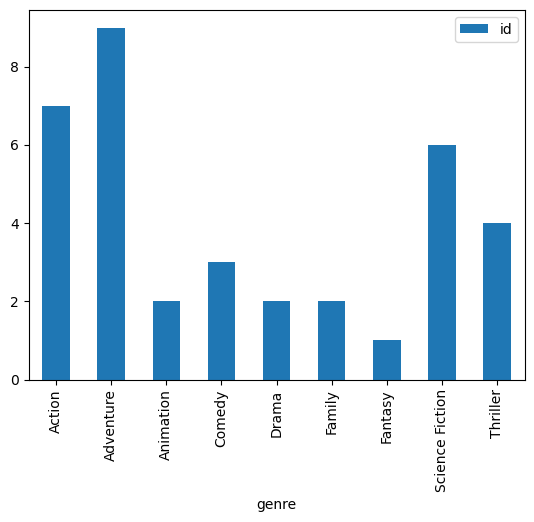

In [153]:
import matplotlib.pyplot as plt

# Load data
pop_movies = movies.sort_values('popularity', ascending=False).head(10)

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
print(genre_count)

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

> The right join ensured that you were analyzing all of the pop_movies. You see from the results that adventure and action are the most popular genres.

### Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.
![Screenshot 2023-08-10 at 8.53.16 PM.png](<attachment:Screenshot 2023-08-10 at 8.53.16 PM.png>)
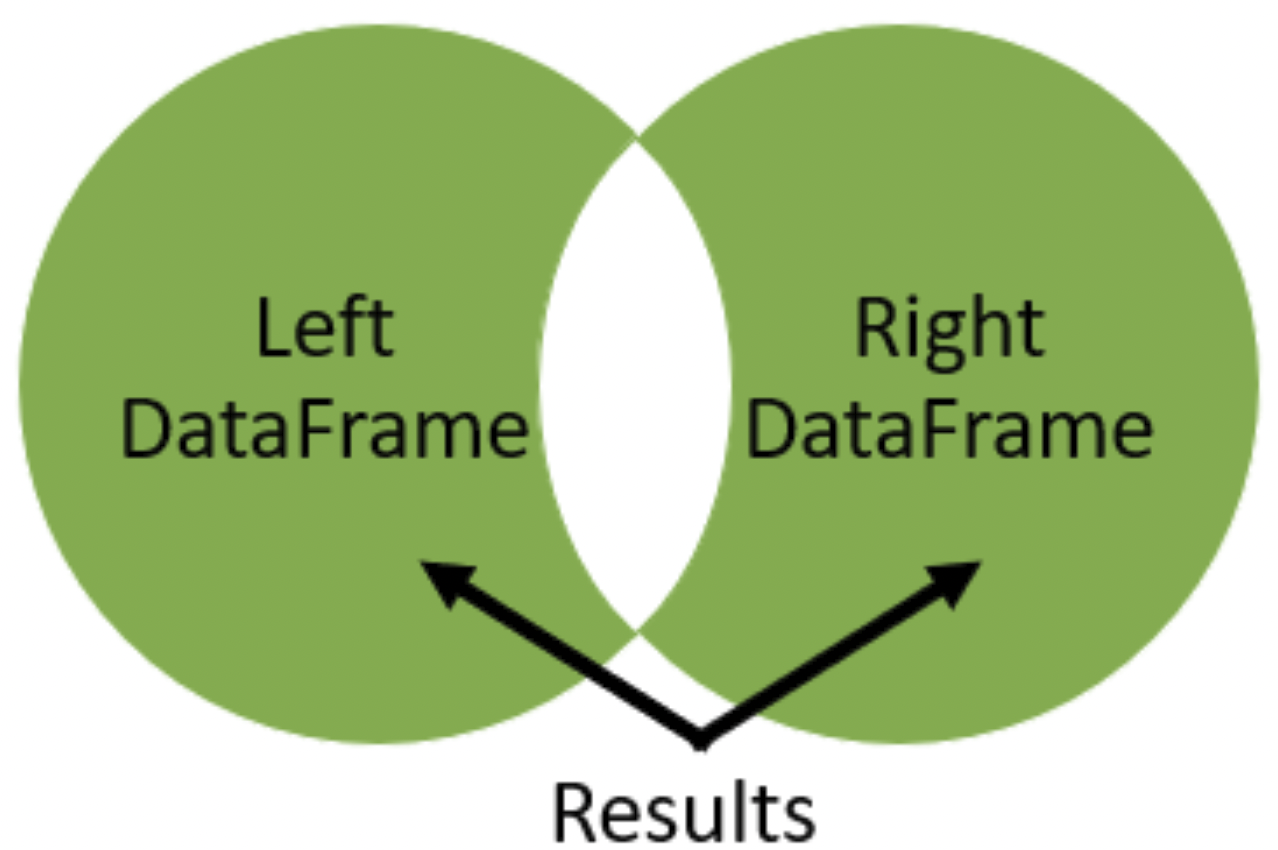

In [154]:
# Load data
casts = pd.read_pickle('../data/casts.p')

# iron man 1
iron_1_movie = movies[movies['title'] == 'Iron Man']
iron_1_movie_casts = iron_1_movie.merge(casts, left_on='id', right_on='movie_id', suffixes=['_mov', '_cast'])
iron_1_actors = iron_1_movie_casts[['character', 'id_cast', 'name']]

# iron man 2
iron_2_movie = movies[movies['title'] == 'Iron Man 2']
iron_2_movie_casts = iron_2_movie.merge(casts, left_on='id', right_on='movie_id', suffixes=['_mov', '_cast'])
iron_2_actors = iron_2_movie_casts[['character', 'id_cast', 'name']]

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on='id_cast', how='outer', suffixes=['_1', '_2'])

# Create an index that returns true if name_1 or name_2 are null
m = iron_1_and_2['name_1'].isna() | iron_1_and_2['name_2'].isna() 

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())


                                    character_1  id_cast           name_1  \
0                                        Yinsen    17857       Shaun Toub   
2                   Obadiah Stane / Iron Monger     1229     Jeff Bridges   
3  Lt. Col. James "Rhodey" Rhodes / War Machine    18288  Terrence Howard   
5                                          Raza    57452      Faran Tahir   
8                                    Abu Bakaar   173810    Sayed Badreya   

  character_2 name_2  
0         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
5         NaN    NaN  
8         NaN    NaN  


> Using an outer join, you were able to pick only those rows where the actor played in only one of the two movies.

### Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [155]:
crews = pd.read_pickle('../data/crews.p')

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=['_dir', '_crew'])

# Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' 
# and avoids rows with the job of 'Director' in the right table
boolean_filter = (crews_self_merged['job_dir'] == "Director" ) & (crews_self_merged['job_crew'] != 'Director')
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())


        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


> By merging the table to itself, you compared the value of the __director__ from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

### Index merge
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.



In [156]:
# Set index to id
movies_indexed = movies.set_index('id').copy()
ratings = pd.read_pickle('../data/ratings.p')
ratings_indexed = ratings.set_index('id')

print(movies_indexed.head(), '\n')
print(ratings_indexed.head())

                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12
38365             Grown Ups   38.864027   2010-06-24
9672               Infamous    3.680896   2006-11-16
12819       Alpha and Omega   12.300789   2010-09-17 

        vote_average  vote_count
id                              
19995            7.2     11800.0
285              6.9      4500.0
206647           6.3      4466.0
49026            7.6      9106.0
49529            6.1      2124.0


In [157]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies_indexed.merge(ratings_indexed, on='id')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

                      title  popularity release_date  vote_average  vote_count
id                                                                            
257            Oliver Twist   20.415572   2005-09-23           6.7       274.0
14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5        27.0
38365             Grown Ups   38.864027   2010-06-24           6.0      1705.0
9672               Infamous    3.680896   2006-11-16           6.4        60.0
12819       Alpha and Omega   12.300789   2010-09-17           5.3       124.0


#### Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [158]:
# Load data
sequels = pd.read_pickle('../data/sequels.p')
sequels_indexed = sequels.set_index('id').copy()
financials_indexed = financials.set_index('id').copy()

# Merge sequels and financials on index id
sequels_fin = sequels_indexed.merge(financials_indexed, on='id', how='left')
sequels_fin.head()

,title,sequel,budget,revenue
id,,,,
19995,Avatar,<NA>,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,<NA>,200000000.0,1.845034e+09
24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [159]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, left_on='sequel', right_on='id', right_index=True, how='inner', suffixes=['_org', '_seq'])
orig_seq.head()

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq
id,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,<NA>,200000000.0,1.066970e+09
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,<NA>,250000000.0,9.339592e+08
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08


In [160]:
# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org'] 
orig_seq.head()

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08,123812836.0
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,<NA>,200000000.0,1.066970e+09,569602834.0
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,<NA>,250000000.0,9.339592e+08,-4253541.0
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09,192601579.0
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08,54919036.0


In [161]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]
titles_diff.sort_values('diff', ascending=False).head()

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08


> To complete this exercise, you needed to merge tables on their index and merge another table to itself. After the calculations were added and sub-select specific columns, the data was sorted. You found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie


### Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

In [162]:
dict_emp = {
    "srid": [1, 2, 3, 4, 5, 6, 7, 8],
    "lname": ["Adams", "Edwards", "Peacock", "Park", "Johnson", "Mitchell", "King", "Callahan"],
    "fname": ["Andrew", "Nancy", "Jane", "Margaret", "Steve", "Michael", "Robert", "Laura"],
    "title": ["General Manager", "Sales Manager", "Sales Support Agent", "Sales Support Agent", "Sales Support Agent", "IT Manager", "IT Staff", "IT Staff"],
    "hire_date": ["2002-08-14", "2002-05-01", "2002-04-01", "2003-05-03", "2003-10-17", "2003-10-17", "2004-01-02", "2004-03-04"],
    "email": ["andrew@chinookcorp.com", "nancy@chinookcorp.com", "jane@chinookcorp.com", "margaret@chinookcorp.com", "steve@chinookcorp.com", "michael@chinookcorp.com", "robert@chinookcorp.com", "laura@chinookcorp.com"]
}

employees = pd.DataFrame(dict_emp)
top_cust = pd.read_csv('../data/top_cust.csv')

In [163]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title   hire_date  \
0     1     Adams   Andrew  General Manager  2002-08-14   
1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5     6  Mitchell  Michael       IT Manager  2003-10-17   
6     7      King   Robert         IT Staff  2004-01-02   
7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


> You performed an anti join by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that there are five employees not supporting top customers. Anti joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

In [164]:
business_owners = pd.read_pickle('../data/business_owners.p')
business_owners

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT
...,...,...,...,...
21347,9513,THOMAS,MAHLUM,SECRETARY
21348,9563,GUADALUPE,PEREZ,PRESIDENT
21349,9638,STEVEN,JENSEN,VICE PRESIDENT
21350,9922,MANUEL,SALAZAR,SECRETARY


#### Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

In [165]:
gdp = pd.read_csv('../data/WorldBank_GDP.csv', usecols=['country_code','year','gdp'])
sp500 = pd.read_csv('../data/S&P500.csv')

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.040669
returns  0.040669  1.000000


### merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided.

### Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

In [166]:
dict_unemployment = {
    'date': [
        '2013-06-01', '2014-01-01', '2014-06-01', '2015-01-01', '2015-06-01',
        '2016-01-01', '2016-06-01', '2017-01-01', '2017-06-01', '2018-01-01',
        '2018-06-01', '2019-01-01', '2019-06-01', '2020-01-01'
    ],
    'unemployment_rate': [
        7.5, 6.7, 6.1, 5.6, 5.3, 5.0, 4.9, 4.7, 4.3, 4.1, 4.0, 3.9, 3.7, 3.5
    ]
}

dict_inflation = {
    'date': [
        '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
        '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
        '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
        '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
        '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
        '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
        '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
        '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
        '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'
    ],
    'cpi': [
        235.288, 235.547, 236.028, 236.468, 236.918, 237.231, 237.498, 237.460, 237.477, 237.430, 236.983,
        236.252, 234.718, 235.236, 236.005, 236.156, 236.974, 237.684, 238.053, 238.028, 237.506, 237.781,
        238.016, 237.817, 237.833, 237.469, 238.038, 238.827, 239.464, 240.167, 240.150, 240.602, 241.051,
        241.691, 242.029, 242.772, 243.780, 243.961, 243.749, 244.051, 243.962, 244.182, 244.390, 245.297,
        246.418, 246.587, 247.332, 247.901, 248.884, 249.369, 249.498, 249.956, 250.646, 251.134, 251.597,
        251.879, 252.010, 252.794, 252.760, 252.723
    ],
    'seriesid': [
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0',
        'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0', 'CUSR0000SA0'
    ],
    'data_type': [
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX',
        'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX', 'SEASONALLY ADJUSTED INDEX'
    ]
}

unemployment = pd.DataFrame(dict_unemployment)
inflation = pd.DataFrame(dict_inflation)

inflation.shape

(60, 4)

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


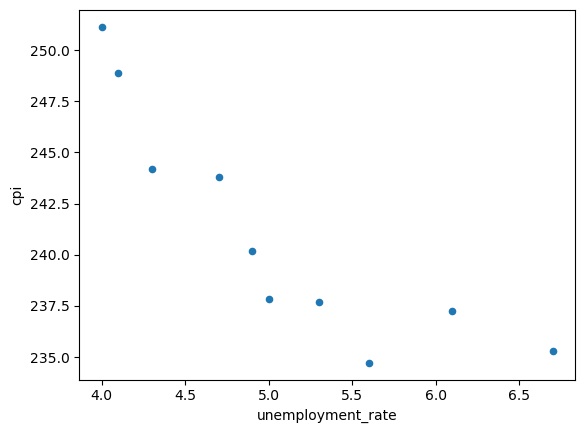

In [167]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate', y='cpi', kind='scatter')
plt.show()

> You created a Phillips curve. There are critics of the curve, but what is more important in this example is that you were able to use entries where you had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. You might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.

